In [3]:
import matplotlib
import numpy as np
import pandas as pd
from plot_paper_utils import swarm_task_perf, add_arch_type
import os

import sys
sys.path.append('../code')
from path_utils import PATH_TO_RESULTS

#### Load the results

In [6]:
res_df = pd.read_hdf(os.path.join(PATH_TO_RESULTS,'task_driven_results_active.h5'), 'df')  

In [7]:
save_flag = False
PATH_TO_FIG = None

model_task_list = np.unique(res_df.model_task)


#### Plot the task performance for each task

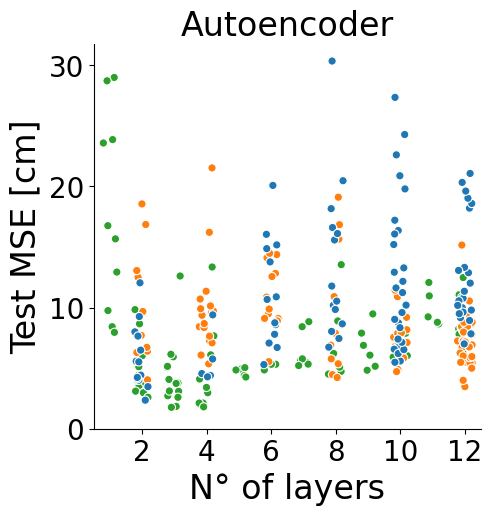

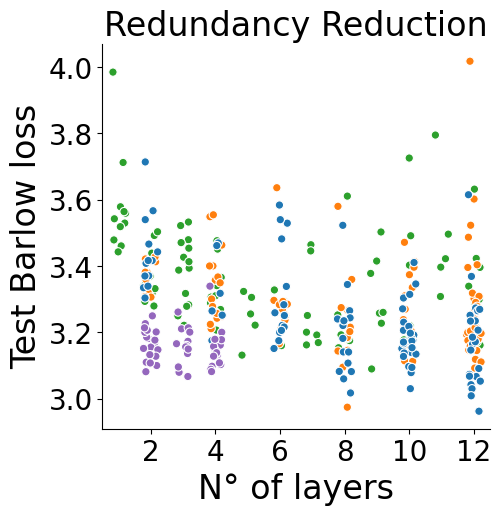

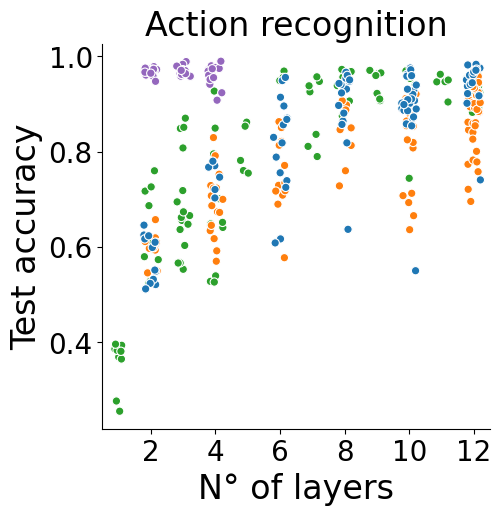

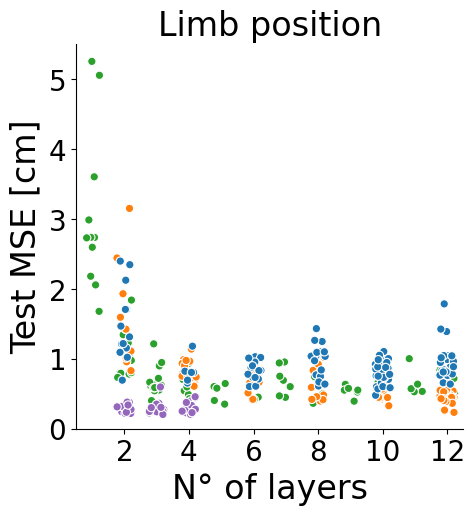

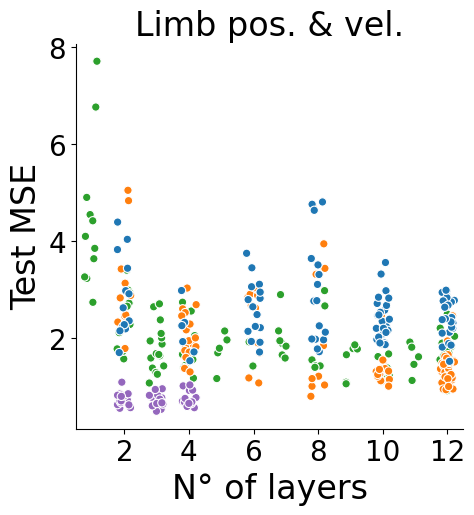

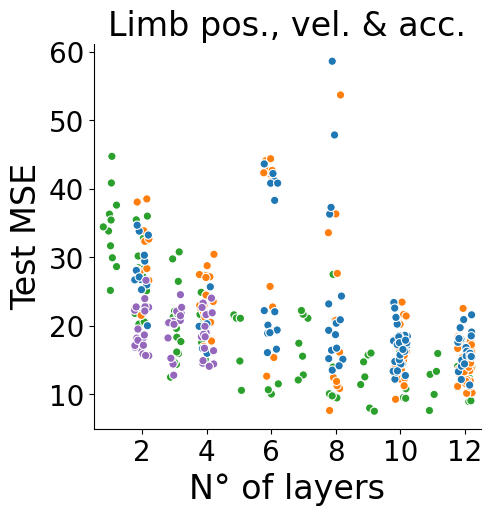

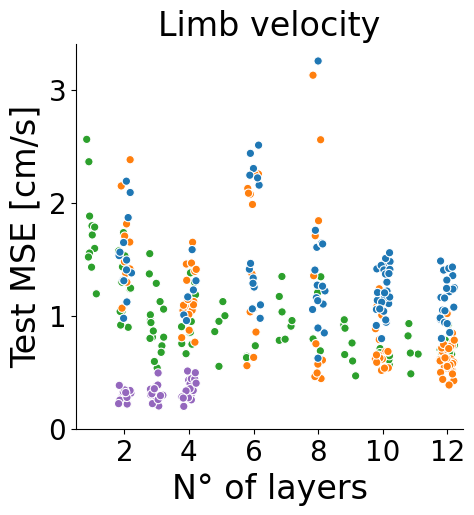

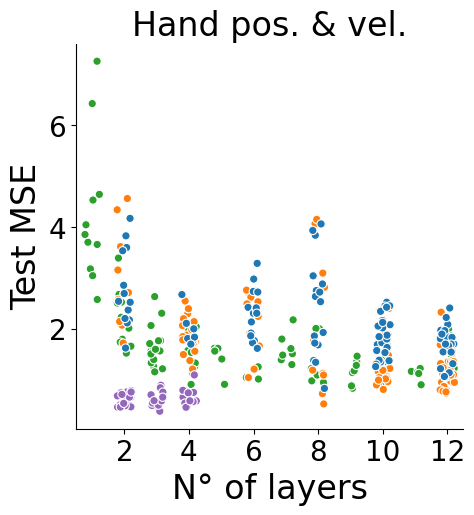

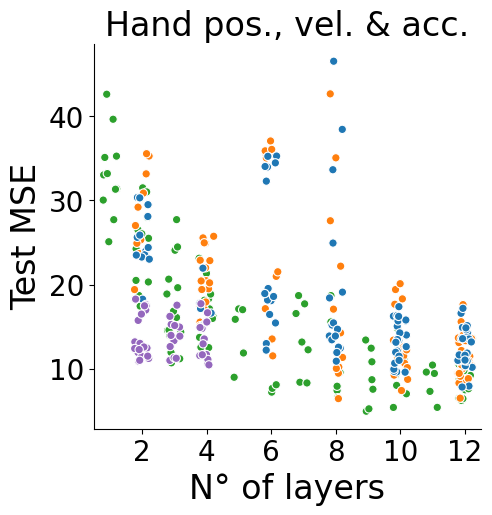

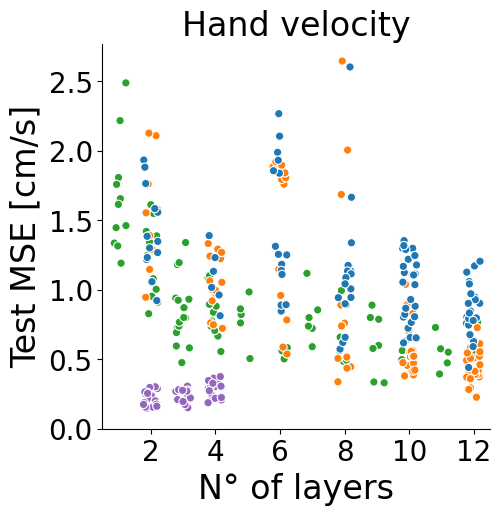

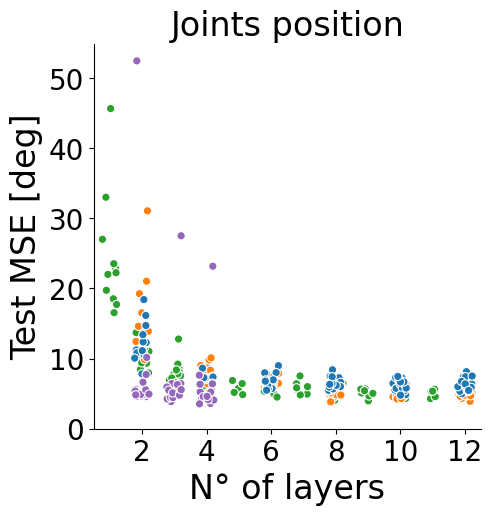

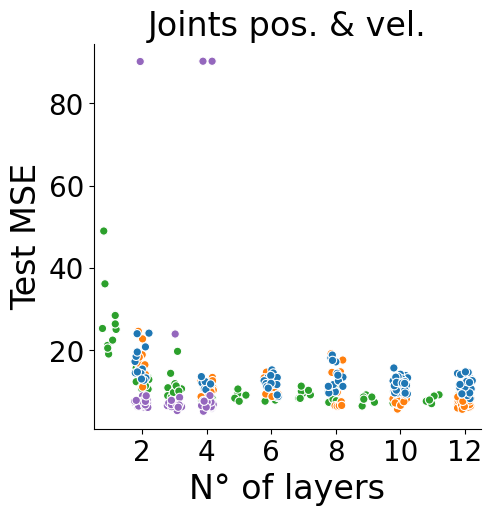

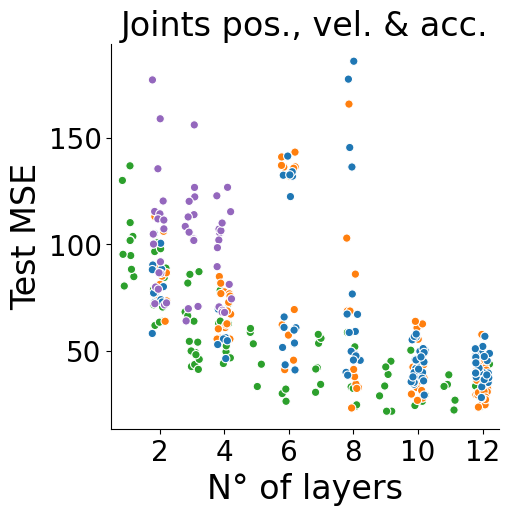

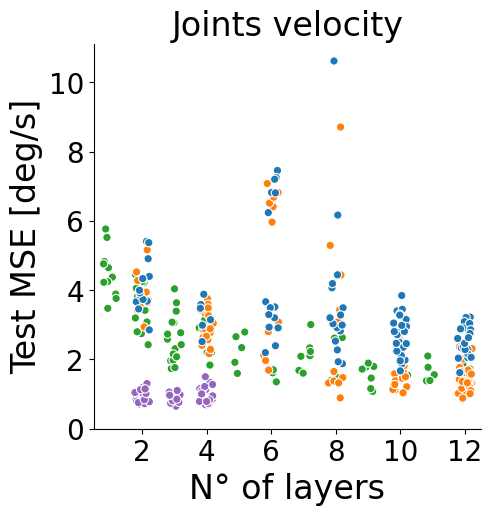

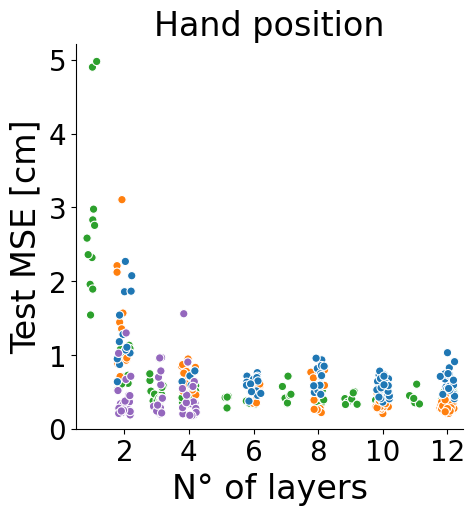

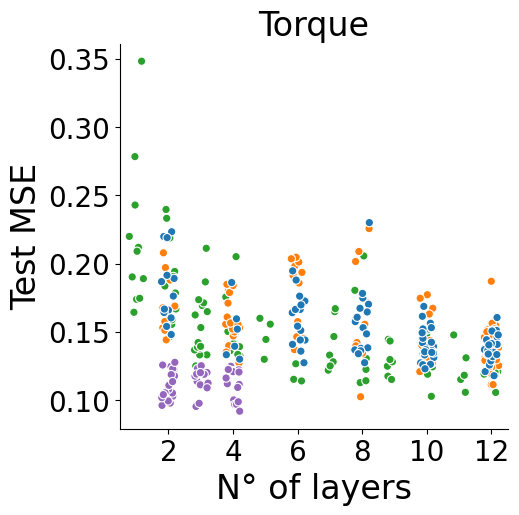

In [8]:
for model_task_tmp in model_task_list:

    df_sub = res_df[res_df.monkey == 'Snap']
    res_df_torque = df_sub[df_sub.model_task == model_task_tmp]
    res_df_torque = res_df_torque.groupby(['model_name'],as_index=False).mean()

    res_df_torque = add_arch_type(res_df_torque)
    res_df_torque['index'] = res_df_torque['arch_type'].apply(['spatiotemporal', 'temporal_spatial', 'spatial_temporal','lstm'].index)
    res_df_torque = res_df_torque.sort_values(['index'])
    res_df_torque = res_df_torque.reset_index(drop=True)

    swarm_task_perf(res_df_torque, model_task_tmp, save_flag, PATH_TO_FIG)